# Business Analytics for a Retail Store using Python

This project is meant to show my competency in data science in a business context. I will demostrate skills in the following areas:

 - Importing data with python into a pandas dataframe,
 - Data wrangling,
 - Data visualization,
 - Exploratory data analysis,
 - Predictive analysis and model selection &
 - Data reporting.

## Part 1: Data Cleaning

## Defining the problem
### TinyCo Retail Store

TinyCO is a retail business which sells different types of SKUs in its 5 different stores. The Supply Chain Management department would like to know the demand of these SKUs in all of the company's stores.

Upon requesting some data dating back 3 years for the business processes, the manager for one of the stores sent the follwoing email:
> _Welcome to TinyCO! I have attached the data you requested for in the spreadsheet. It has 6 tabs: SKU master and separate tabs for each of the following stores: 312, 323, 415, 521 and 632. The store tabs contain all of the sales information for the past 2 years (that is all I could find) for that respective store. It lists the database or transaction ID, date, the SKU, quantity sold that day and total revenue from those sales. The SKU master tab coontains some information on each SKU, such as the name, weight, cube, unit cost, etc. This was really hard to get, so I hope it is all you need._

### Importing the data

Upon opening the excel file, we notice that there are 6 tabs of data as decsribed in the email. These are: 'SKU Master', 'Store 312', 'Store 323', 'Store 415', 'Store 521' and 'Store 632'. Let us import each excel tab as a pandas dataframe.

In [33]:
import pandas as pd

In [34]:
SKU_Master = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="SKU Master")
Store_312 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 312")
Store_323 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 323")
Store_415 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 415")
Store_521 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 521")
Store_632 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 632")

### View a subset of the data

In [1]:
SKU_Master

NameError: name 'SKU_Master' is not defined

In [36]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93


We will begin with analyzing STore_312 with reference to SKU_Master.

### Exploring and Cleaning the data

In [37]:
SKU_Master.dtypes

Department      int64
Class           int64
Style           int64
Color           int64
SKU             int64
Cost          float64
Price         float64
Vendor         object
dtype: object

In [38]:
Store_312.dtypes

DB_ID                    int64
SKU                     object
Store                    int64
Date            datetime64[ns]
Unit Sales              object
Dollar Sales           float64
dtype: object

There is something interesting about the Store_312 dtypes. Both 'SKU' and 'Unit Sales' have object/string dtypes. We would normally expect these to be integers.

This kind of data can present us with a few issues:
 - Data that we expect to be integers but is presented in string form can contain typing erros, i.e., foreign characters that might not have the same format as the other values in the feature,
 - String/object data types cannot be plotted quantitatively on a plot.

Let us get a statistical summary of the data to get a more detailed llok of the data.

In [39]:
print("Number of rows in Store_312:", len(Store_312))
Store_312.describe(include="all")

Number of rows in Store_312: 3696


,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.696000e+03,3.696000e+03,3696.0,3696,3646.0,3616.000000
unique,NaN,1.000000e+01,NaN,642,61.0,NaN
top,NaN,5.001201e+10,NaN,2014-10-29 00:00:00,2.0,NaN
freq,NaN,6.080000e+02,NaN,12,912.0,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.095478e+05,NaN,312.0,NaN,NaN,1097.783678
std,6.984279e+05,NaN,0.0,NaN,NaN,20388.315627
min,7.944400e+04,NaN,312.0,NaN,NaN,-59.940000
25%,8.282375e+04,NaN,312.0,NaN,NaN,15.980000


In [40]:
Store_312["SKU"].unique()

array([50012011250, '50*12011250', 50012011340, 50012011341, 50013000110,
       8000451112, 7312455530, 7312455520, 8000520021, 50012011240],
      dtype=object)

The data summary of SKU gives us 10 unique values. However, a closer inspection shows that SKU has a **top** value. A top value can only be returned if the column contains int or float values. This means that the column has a mixture of int/float values and object values. Upon printing the unique values, we determine our culprit. A typing error was made in which 50012011250 was entered as 50*12011250 on at least one occassion. Let us print out the rows where this occurs.

In [41]:
Store_312[Store_312["SKU"]=='50*12011250']

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
164,79608,50*12011250,312,2015-02-14,1,9.99
165,79609,50*12011250,312,2015-02-16,4,39.96
166,79610,50*12011250,312,2015-02-17,3,29.97
250,79694,50*12011250,312,2015-05-28,1,9.99
300,79744,50*12011250,312,2015-07-27,5,49.95
346,79790,50*12011250,312,2015-09-21,2,19.98
430,79874,50*12011250,312,2015-12-28,4,39.96
513,79957,50*12011250,312,2016-04-07,5,49.95


We can see that this happened quite a number of times. We can rectify this by simply replacing the mistake with the correct thing.

In [42]:
def correction(x):
    if x == '50*12011250':
        x = 50012011250
    return x

In [43]:
Store_312["SKU"] = Store_312["SKU"].apply(correction)

In [44]:
Store_312["SKU"].unique()

array([50012011250, 50012011340, 50012011341, 50013000110,  8000451112,
        7312455530,  7312455520,  8000520021, 50012011240])

After the operation above, we can see that the unique values in the 'SKU' column are now down to 9, and the problem value has disappered.

In [48]:
Store_312.describe(include="all")

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.696000e+03,3.696000e+03,3696.0,3696,3646.0,3616.000000
unique,NaN,NaN,NaN,642,61.0,NaN
top,NaN,NaN,NaN,2014-10-29 00:00:00,2.0,NaN
freq,NaN,NaN,NaN,12,912.0,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.095478e+05,2.688847e+10,312.0,NaN,NaN,1097.783678
std,6.984279e+05,2.106715e+10,0.0,NaN,NaN,20388.315627
min,7.944400e+04,7.312456e+09,312.0,NaN,NaN,-59.940000
25%,8.282375e+04,8.000451e+09,312.0,NaN,NaN,15.980000


Now to investigate the 'Unit Sales' column.

In [49]:
Store_312["Unit Sales"].unique()

array([3, 2, 5, 7, 4, 1, 6, nan, 30000, '-A45%0 9', 11, '-A45%0 2', 50000,
       -2, -3, 40000, 9, '-A45%0 4', '-A45%0 3', 10000, -4, 20000, 8, -6,
       '-A45%0 1', -5, 60000, 0, '+9-A1', '+9-A2', -1, '+9-A0', 34, 32,
       23, 31, 41, 36, 33, 26, 25, 30, 42, 18, 17, 28, 12, 40, 38, 16, 39,
       35, 37, 10, 13, 14, 15, '#0 1', '#0 0', '#0 3', '#0 4', '#0 2'],
      dtype=object)

As displayed above, this column contains NaN values and string values that resemble unexecuted spreadsheet formulae. Let us investigate what the rows with the latter look like.

In [50]:
Store_312[Store_312["Unit Sales"].apply(type) == str]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
26,79470,50012011250,312,2014-09-03,-A45%0 9,NaN
58,79502,50012011250,312,2014-10-13,-A45%0 2,NaN
74,79518,50012011250,312,2014-10-31,-A45%0 2,NaN
106,79550,50012011250,312,2014-12-08,-A45%0 4,NaN
115,79559,50012011250,312,2014-12-18,-A45%0 3,NaN
211,79655,50012011250,312,2015-04-11,-A45%0 2,NaN
228,79672,50012011250,312,2015-05-01,-A45%0 3,NaN
261,79705,50012011250,312,2015-06-10,-A45%0 2,NaN
320,79764,50012011250,312,2015-08-20,-A45%0 1,NaN
355,79799,50012011250,312,2015-10-01,-A45%0 4,NaN


As we can see from the filtered dataframe above, every row with that particular anomaly has a NaN on the corresponding 'Dollar Sales' value. This is not surprising as the 'Dollar Sales' depend on the 'Unit Sales'. The wise thing to do here would be to drop all the rows with the anomalies.

In [54]:
Store_312 = Store_312[Store_312["Unit Sales"].apply(type) != str]

In [55]:
Store_312["Unit Sales"].unique()

array([3, 2, 5, 7, 4, 1, 6, nan, 30000, 11, 50000, -2, -3, 40000, 9,
       10000, -4, 20000, 8, -6, -5, 60000, 0, -1, 34, 32, 23, 31, 41, 36,
       33, 26, 25, 30, 42, 18, 17, 28, 12, 40, 38, 16, 39, 35, 37, 10, 13,
       14, 15], dtype=object)

The problem entries have now been removed. Now to deal with the NaN values.

In [56]:
import numpy as np

In [61]:
Store_312[pd.isnull(Store_312["Unit Sales"])]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
16,79460,50012011250,312,2014-08-22,NaN,NaN
49,79493,50012011250,312,2014-10-02,NaN,NaN
55,79499,50012011250,312,2014-10-09,NaN,NaN
85,79529,50012011250,312,2014-11-13,NaN,NaN
119,79563,50012011250,312,2014-12-23,NaN,NaN
243,79687,50012011250,312,2015-05-20,NaN,NaN
267,79711,50012011250,312,2015-06-17,NaN,NaN
305,79749,50012011250,312,2015-08-03,NaN,NaN
333,79777,50012011250,312,2015-09-05,NaN,NaN
338,79782,50012011250,312,2015-09-11,NaN,NaN


In [62]:
len(Store_312[pd.isnull(Store_312["Unit Sales"])])

50

Again, the 'Dollar Sales' column is dependent arithmetically on the 'Unit Sales' column. As a result, if the latter is a NaN value, the former will also be a NaN. The number of rows where this is the case is only 50. A negligible figure given the >3000 rows we'll remain with. Dropping these rows will not affect our data that much.

In [64]:
Store_312.dropna(subset=["Unit Sales"], inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
Store_312["Unit Sales"].unique()

array([3, 2, 5, 7, 4, 1, 6, 30000, 11, 50000, -2, -3, 40000, 9, 10000, -4,
       20000, 8, -6, -5, 60000, 0, -1, 34, 32, 23, 31, 41, 36, 33, 26, 25,
       30, 42, 18, 17, 28, 12, 40, 38, 16, 39, 35, 37, 10, 13, 14, 15],
      dtype=object)

The column no longer contains missing values but it still has a dtype=object. Since 'Unit Sales' are supposed to be whole numbers, let us convert the column to an int.

In [68]:
Store_312["Unit Sales"] = Store_312["Unit Sales"].apply(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
Store_312["Unit Sales"].dtypes

dtype('int64')

As we can see, the dtype has been converted to int.

In [72]:
Store_312.describe(include="all")

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.616000e+03,3.616000e+03,3616.0,3616,3616.000000,3616.000000
unique,NaN,NaN,NaN,642,NaN,NaN
top,NaN,NaN,NaN,2014-10-29 00:00:00,NaN,NaN
freq,NaN,NaN,NaN,12,NaN,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.036247e+05,2.637689e+10,312.0,NaN,108.081305,1097.783678
std,6.914588e+05,2.101314e+10,0.0,NaN,2040.948271,20388.315627
min,7.944400e+04,7.312456e+09,312.0,NaN,-6.000000,-59.940000
25%,8.284975e+04,8.000451e+09,312.0,NaN,2.000000,15.980000


In [73]:
print("The dataframe has: ", len(Store_312), " rows")

The dataframe has:  3616  rows


The count on each column equals that of the length of the dataframe, meaning that we have eliminated all NaN rows.

Next, we should check for duplicated values. We are lucky that our data comes with a database ID column, 'DB_ID'. A database ID is unique and cannot be repeated. If one is repeated, then we know that it is a duplicated value.

In [80]:
Store_312.drop_duplicates(subset ="DB_ID", keep = False, inplace = True)

In [81]:
len(Store_312)

3610

The length of the data frame changed from 3616 to 3610, which shows that we had 6 duplicates in our data. They were all removed.

#### Dealing with Outliers

The next thing to explore in our data is its distribution. What is its shape? How is it distributed around the mean/median? Are there any outliers? If so, can they be explained or are they errors?

To begin to answer all these question, let us look at a visual representation of our data.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

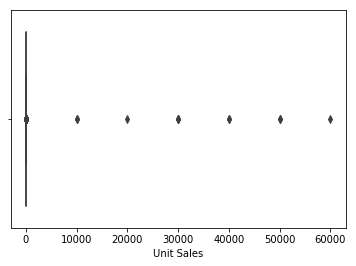

In [84]:
US_bplot = sns.boxplot(x=Store_312["Unit Sales"])
US_bplot

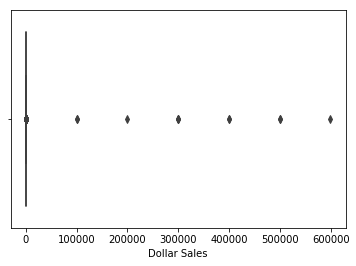

In [105]:
DS_bplot = sns.boxplot(x=Store_312["Dollar Sales"])
DS_bplot

Our graphs cannot be interpreted because the data contains very massive outliers. The scale is too large. One way to go around this is to transform the data onto a shorter scale. We can use the a log transformtion for this.

However, the 'Unit Sales' and 'Dollar Sales' columns contain negative values, so we have to deal with that first as we cannot find the log of a number <1.

In [107]:
import numpy as np

Store_312["log(Unit Sales)"] = Store_312["Unit Sales"] + 7
Store_312["log(Unit Sales)"] = Store_312["log(Unit Sales)"].apply(np.log)

In [109]:
Store_312["log(Dollar Sales)"] = Store_312["Dollar Sales"] + 60
Store_312["log(Dollar Sales)"] = Store_312["log(Dollar Sales)"].apply(np.log)

In [110]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
0,79444,50012011250,312,2014-08-04,3,29.97,2.302585,4.499476
1,79445,50012011250,312,2014-08-05,2,19.98,2.197225,4.381777
2,79446,50012011250,312,2014-08-06,5,49.95,2.484907,4.700026
3,79447,50012011250,312,2014-08-07,3,29.97,2.302585,4.499476
4,79448,50012011250,312,2014-08-08,7,69.93,2.639057,4.866996


The scales have now been standardized. Let us try and plot our boxplots.

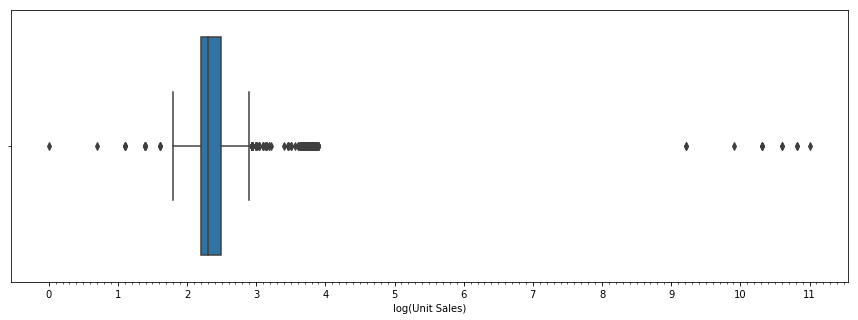

In [135]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every 0.1
major_ticks = np.arange(0, 12, 1)
minor_ticks = np.arange(0, 12, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

sns.boxplot(x=Store_312["log(Unit Sales)"], ax=ax)

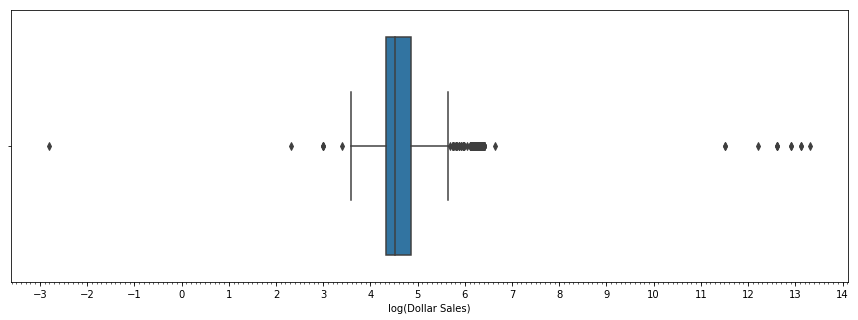

In [149]:
fig = plt.figure(figsize=(15,5))
ax_1 = fig.add_subplot(1, 1, 1)

major_ticks_1 = np.arange(-4, 15, 1)
minor_ticks_1 = np.arange(-4, 15, 0.1)

ax_1.set_xticks(major_ticks_1)
ax_1.set_xticks(minor_ticks_1, minor=True)

sns.boxplot(x=Store_312["log(Dollar Sales)"], ax=ax_1)

In [150]:
Store_312.describe()

,DB_ID,SKU,Store,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
count,3.610000e+03,3.610000e+03,3610.0,3610.000000,3610.000000,3610.000000,3610.000000
mean,5.011352e+05,2.633761e+10,312.0,108.256510,1099.572837,2.435354,4.729917
std,6.893287e+05,2.100847e+10,0.0,2042.639585,20405.209190,0.628199,0.714406
min,7.944400e+04,7.312456e+09,312.0,-6.000000,-59.940000,0.000000,-2.813411
25%,8.284825e+04,8.000451e+09,312.0,2.000000,15.980000,2.197225,4.330470
50%,9.381650e+04,8.000520e+09,312.0,3.000000,31.990000,2.302585,4.521680
75%,1.000640e+06,5.001201e+10,312.0,5.000000,68.970000,2.484907,4.859580
max,2.001795e+06,5.001300e+10,312.0,60000.000000,599400.000000,11.002217,13.303785


'Unit Sales' and 'Dollar Sales' have similar shape distributions, which is not surprising since 'Dollar Sales' are a multiple of the former. However, there are differences in the positions of the outliers, which can be explained by different unit prices.

We should investigate these outliers to see if they are errors, or actual events. IF they're events, should we keep them around or not as they may heavily bias our prediction model later on.

Let us look at the boxplot of 'Unit Sales'. The outliers to the left can be explained as returns that the business has encountered, and therefore, have been billed negatively. Now to examine those to the right.

In [158]:
Store_312[Store_312["log(Unit Sales)"]>2.9].sort_values("Unit Sales", ascending = False)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
474,79918,50012011250,312,2016-02-18,60000,599400.00,11.002217,13.303785
89,79533,50012011250,312,2014-11-18,50000,499500.00,10.819918,13.121483
589,80033,50012011250,312,2016-07-05,50000,499500.00,10.819918,13.121483
98,79542,50012011250,312,2014-11-28,40000,399600.00,10.596810,12.898369
448,79892,50012011250,312,2016-01-18,40000,399600.00,10.596810,12.898369
362,79806,50012011250,312,2015-10-09,30000,299700.00,10.309186,12.610737
21,79465,50012011250,312,2014-08-28,30000,299700.00,10.309186,12.610737
276,79720,50012011250,312,2015-06-27,30000,299700.00,10.309186,12.610737
210,79654,50012011250,312,2015-04-10,20000,199800.00,9.903837,12.205372
481,79925,50012011250,312,2016-02-26,10000,99900.00,9.211040,11.512525


By looking at the subset above, one can intuitively deduce that we have 2 classes of outliers here: those in double digits and those in the thousands. The ones in double digits can be attributed to large orders made by single customers. Let us subset those in the thousands and look for more information.

In [163]:
Store_312[Store_312["Unit Sales"]>=10000].sort_values("Date", ascending = True)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
21,79465,50012011250,312,2014-08-28,30000,299700.0,10.309186,12.610737
89,79533,50012011250,312,2014-11-18,50000,499500.0,10.819918,13.121483
98,79542,50012011250,312,2014-11-28,40000,399600.0,10.596810,12.898369
174,79618,50012011250,312,2015-02-26,10000,99900.0,9.211040,11.512525
210,79654,50012011250,312,2015-04-10,20000,199800.0,9.903837,12.205372
276,79720,50012011250,312,2015-06-27,30000,299700.0,10.309186,12.610737
362,79806,50012011250,312,2015-10-09,30000,299700.0,10.309186,12.610737
448,79892,50012011250,312,2016-01-18,40000,399600.0,10.596810,12.898369
474,79918,50012011250,312,2016-02-18,60000,599400.0,11.002217,13.303785
481,79925,50012011250,312,2016-02-26,10000,99900.0,9.211040,11.512525


Upon examining the columns of this subset, one thing is glaringly obvious. These outliers are all one product. The 'SKU' is the same -- 50012011250.

In [161]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,8.0,6.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports


After exploring the SKU_Master table, nothing seems to be perculiar about this particular SKU. As TinyCO is an SME retail store, it is extremely unlikely it would carry out orders in the thousands at one go. This would simply not be sustainable for its inventory management. We conclude that these are entry errors by a multiple of 10000. We reach this decision because our IQR is 3, and it'd follow for us to assume this data falls in that range. Let us correct that.

In [170]:
def div_10000(x):
    if x >= 10000:
        x = x/10000
    return x

In [166]:
Store_312["Unit Sales"] = Store_312["Unit Sales"].apply(div_10000)

In [167]:
Store_312[Store_312["Unit Sales"]>=10000]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)


The subset now returns an empty dataframe. Let us also check some of the entries using their DB_IDs to see if our operation yielded the results we want.

In [168]:
Store_312[Store_312["DB_ID"]==79533]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
89,79533,50012011250,312,2014-11-18,5.0,499500.0,10.819918,13.121483


In [169]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
0,79444,50012011250,312,2014-08-04,3.0,29.97,2.302585,4.499476
1,79445,50012011250,312,2014-08-05,2.0,19.98,2.197225,4.381777
2,79446,50012011250,312,2014-08-06,5.0,49.95,2.484907,4.700026
3,79447,50012011250,312,2014-08-07,3.0,29.97,2.302585,4.499476
4,79448,50012011250,312,2014-08-08,7.0,69.93,2.639057,4.866996


Our function yielded the results we wanted it to. BUT let us not forget to also fix the anomalies in the 'Dollar Sales' column.

In [171]:
def div_10000_d(x):
    if x >= 99900:
        x = x/10000
    return x

In [172]:
Store_312["Dollar Sales"] = Store_312["Dollar Sales"].apply(div_10000_d)

In [173]:
Store_312[Store_312["DB_ID"]==79533]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
89,79533,50012011250,312,2014-11-18,5.0,49.95,10.819918,13.121483


Let us plot our boxplots again. This time without using a transformed scale.

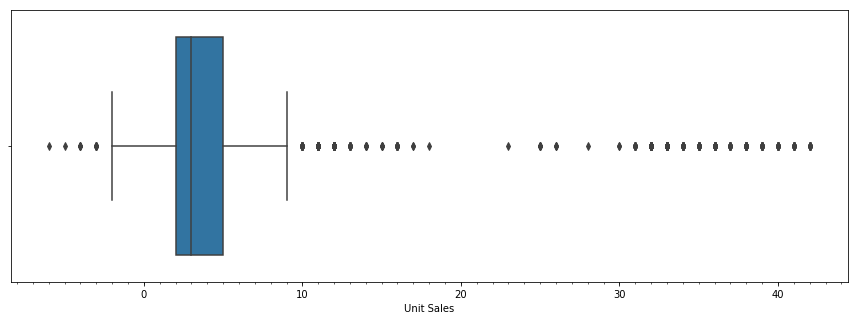

In [185]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 10, minor ticks every 1
major_ticks = np.arange(-10, 46, 10)
minor_ticks = np.arange(-11, 46, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

sns.boxplot(x=Store_312["Unit Sales"], ax=ax)

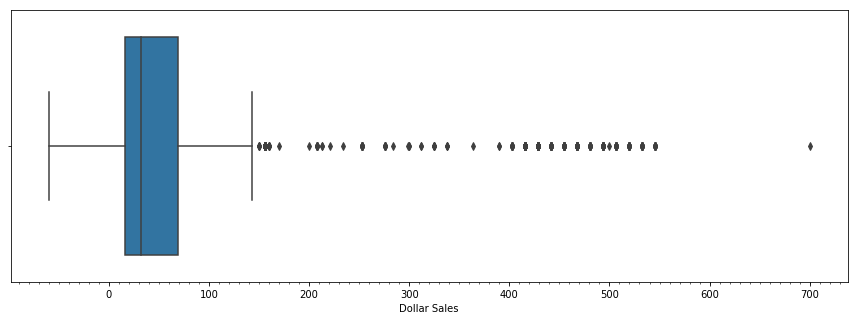

In [183]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 10, minor ticks every 1
major_ticks = np.arange(-100, 750, 100)
minor_ticks = np.arange(-100, 750, 10)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

sns.boxplot(x=Store_312["Dollar Sales"])

This now gives us a better view of the distribution of our sales.

Our data cleaning seems to be complete. However, we forgot one problem sales entries face on a regular basis. Zero entries. A zero entry means that no sale was made. Let us check our data to see if any of these exist.

In [186]:
Store_312[Store_312["Unit Sales"]==0]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)
495,79939,50012011250,312,2016-03-15,0.0,0.0,1.94591,4.094345
521,79965,50012011250,312,2016-04-16,0.0,0.0,1.94591,4.094345
557,80001,50012011250,312,2016-05-28,0.0,0.0,1.94591,4.094345
606,80050,50012011250,312,2016-07-26,0.0,0.0,1.94591,4.094345
623,82523,50012011340,312,2014-08-15,0.0,0.0,1.94591,4.094345
639,82539,50012011340,312,2014-09-09,0.0,0.0,1.94591,4.094345
651,82551,50012011340,312,2014-09-25,0.0,0.0,1.94591,4.094345
700,82600,50012011340,312,2014-12-05,0.0,0.0,1.94591,4.094345
722,82622,50012011340,312,2015-01-02,0.0,0.0,1.94591,4.094345
751,82651,50012011340,312,2015-02-09,0.0,0.0,1.94591,4.094345


They exist, and in quite a number as well. Let us delete them.

In [187]:
Store_312 = Store_312[Store_312["Unit Sales"] != 0]

In [188]:
Store_312[Store_312["Unit Sales"]==0]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales),log(Dollar Sales)


These rows no longer exist from our data.

Let us drop the log columns from our data as we no longer need them.

In [190]:
Store_312.drop(columns=["log(Unit Sales)", "log(Dollar Sales)"], inplace=True)

In [191]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3.0,29.97
1,79445,50012011250,312,2014-08-05,2.0,19.98
2,79446,50012011250,312,2014-08-06,5.0,49.95
3,79447,50012011250,312,2014-08-07,3.0,29.97
4,79448,50012011250,312,2014-08-08,7.0,69.93


The transformation columns have now been dropped.

I took a closer look at the rows that have zero sales. Some of them have SKU numbers that do not exist in the SKU_Master table, particularly 50012011340. Let us examine this further.

In [197]:
print("There are ", Store_312["SKU"].value_counts().count(), " different SKUs.")
Store_312["SKU"].value_counts()

There are  9  different SKUs.


50012011250    585
8000520021     574
8000451112     572
50012011240    494
7312455520     459
7312455530     415
50012011340    313
50012011341    137
50013000110     27
Name: SKU, dtype: int64

In [194]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,8.0,6.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports


The 'SKU' column shows that it has 9 unique values. The SKU_Master table has 8. The foreign one is of course 50012011340. This SKU has 313 entries, however, suggesting that it is not an error. The most likely explanation is that the SKU_Master table has not been updated. This should be flagged for consultation with management.

After cleaning our data, this is what our summery statistics look like:

In [199]:
Store_312.describe()

,DB_ID,SKU,Store,Unit Sales,Dollar Sales
count,3.576000e+03,3.576000e+03,3576.0,3576.000000,3576.000000
mean,4.986775e+05,2.611252e+10,312.0,5.828579,76.489813
std,6.863313e+05,2.098028e+10,0.0,9.047658,119.284141
min,7.944400e+04,7.312456e+09,312.0,-6.000000,-59.940000
25%,8.285875e+04,8.000451e+09,312.0,2.000000,15.980000
50%,9.382150e+04,8.000520e+09,312.0,3.000000,31.990000
75%,1.000636e+06,5.001201e+10,312.0,5.000000,68.970000
max,2.001795e+06,5.001300e+10,312.0,42.000000,699.930000


Our data cleaning is complete, but remember the aim of the analysis is to produce demand and forecast statistics of the different stores. This was for only one store. The data cleaning process should be repeated for every store. For now, let us deal with Store_312.

Let us also export our clean data to a csv just incase we might want to use it elsewhere, or if it's needed for other analyses.

In [200]:
Store_312.to_csv("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/Store_312_clean.csv")

For the sake of presentation, let us start the data analytics in another notebook.

<br>
<br>
<br>
<br>
***
<footer>_Author: Simbarashe Chikaura -- Data Scientist_</footer>
***